# Assignment 1

**Assignment 1: Optimization**

**Goal**: ​Get familiar with gradient-based and derivative-free optimization by implementing these methods and applying them to a given function.

In this assignment we are going to learn about **gradient-based** (GD) optimization methods and **derivative-free optimization** (DFO) methods. The goal is to implement these methods (one from each group) and analyze their behavior. Importantly, we aim at noticing differences between these two groups of methods.

Here, we are interested in ​minimizing​ the following function:

$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7
$$

in the domain $\mathbf{x} = (x_1, x_2) \in [-100, 100]^{2}$ (i.e., $x_1 \in [-100, 100]$, $x_2 \in [-100, 100]$).

In this assignemnt, you are asked to implement:
1. The gradient-descent algorithm.
2. A chosen derivative-free algorithm. *You are free to choose a method.*

After implementing both methods, please run experiments and compare both methods. Please find a more detailed description below.

## 1. Understanding the objective

Please run the code below and visualize the objective function. Please try to understand the objective function, what is the optimum (you can do it by inspecting the plot).

If any code line is unclear to you, please read on that in numpy or matplotlib docs.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# PLEASE DO NOT REMOVE!
# The objective function.
def f(x):
    return (
        x[:, 0] ** 2
        + 2 * x[:, 1] ** 2
        - 0.3 * np.cos(3.0 * np.pi * x[:, 0])
        - 0.4 * np.cos(4.0 * np.pi * x[:, 1])
        + 0.7
    )

In [3]:
# PLEASE DO NOT REMOVE!
# Calculating the objective for visualization.
def calculate_f(x1, x2):
    f_x = []
    for i in range(len(x1)):
        for j in range(len(x2)):
            f_x.append(f(np.asarray([[x1[i], x2[j]]])))

    return np.asarray(f_x).reshape(len(x1), len(x2))

In [9]:
# PLEASE DO NOT REMOVE!
# Define coordinates
x1 = np.linspace(-100.0, 100.0, 400)
x2 = np.linspace(-100.0, 100.0, 400)

# Calculate the objective
f_x = calculate_f(x1, x2).reshape(len(x1), len(x2))

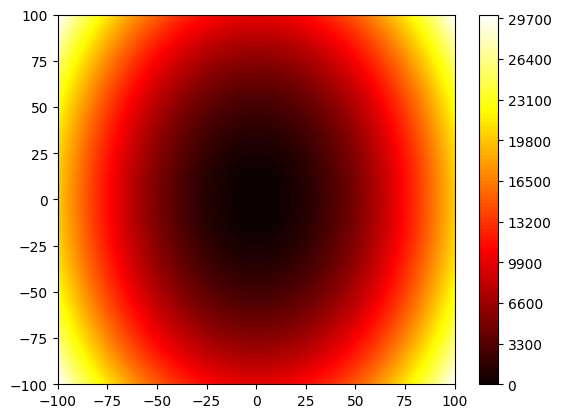

In [10]:
# PLEASE DO NOT REMOVE!
# Plot the objective
plt.contourf(x1, x2, f_x, 100, cmap="hot")
plt.colorbar()

## 2. The gradient-descent algorithm

First, you are asked to implement the gradient descent (GD) algorithm. Please take a look at the class below and fill in the missing parts.

NOTE: Please pay attention to the inputs and outputs of each function.

NOTE: To implement the GD algorithm, we need a gradient with respect to $\mathbf{x}$ of the given function. Please calculate it on a paper and provide the solution below. Then, implement it in an appropriate function that will be further passed to the GD class.

**Question 1 (0-1pt):** What is the gradient of the function $f(\mathbf{x})$? Please fill below both the mathematical expression and within the code.

**Answer:**
\begin{align*}
\nabla_{\mathbf{x}_1} f(\mathbf{x}) &= 2x_1 +(0.9π \sin(3 \pi x_1))\\
\nabla_{\mathbf{x}_2} f(\mathbf{x}) &= 4x_2 +(1.6 \pi \sin(4 \pi x_2))\\
\end{align*}

In [8]:
# =========
# GRADING:
# 0
# 0.5pt - if properly implemented and commented well
# =========
# Implement the gradient for the considered f(x).
def grad(x):
  '''Calculates the partial derivatives for a given array containing x1 and x2
  and returns the gradient.'''
  # The partial derivative for x1:
  pd_x1 = 2*x[:,0]+(0.9*np.pi*np.sin(3*np.pi*x[:,0]))
  # The partial derivative for x2:
  pd_x2 = 4*x[:,1]+(1.6*np.pi*np.sin(4*np.pi*x[:,1]))
  grad = np.hstack((pd_x1.reshape(-1, 1), pd_x2.reshape(-1, 1)))
  #returns the gradient
  return grad




In [5]:
# =========
# GRADING:
# 0
# 0.5pt if properly implemented and commented well
# =========
# Implement the gradient descent (GD) optimization algorithm.
# It is equivalent to implementing the step function.
class GradientDescent(object):
    def __init__(self, grad, step_size=0.1):
        self.grad = grad
        self.step_size = step_size

    def step(self, x_old):
       '''Updates the parameters of the objective function by subtracting the
          product of the step size and the gradient of the old parameters from the
          old parameters.

          '''
       # algorrithm for updating the parameters
       x_new = x_old - (self.step_size * self.grad(x_old))
       # returns the new parameters
       return x_new


In [6]:
# PLEASE DO NOT REMOVE!
# An auxiliary function for plotting.
def plot_optimization_process(ax, optimizer, title):
    # Plot the objective function
    ax.contourf(x1, x2, f_x, 100, cmap="hot")

    # Init the solution
    x = np.asarray([[90.0, -90.0]])
    x_opt = x
    # Run the optimization algorithm
    for i in range(num_epochs):
        x = optimizer.step(x)
        x_opt = np.concatenate((x_opt, x), 0)

    ax.plot(x_opt[:, 0], x_opt[:, 1], linewidth=3.0)
    ax.set_title(title)

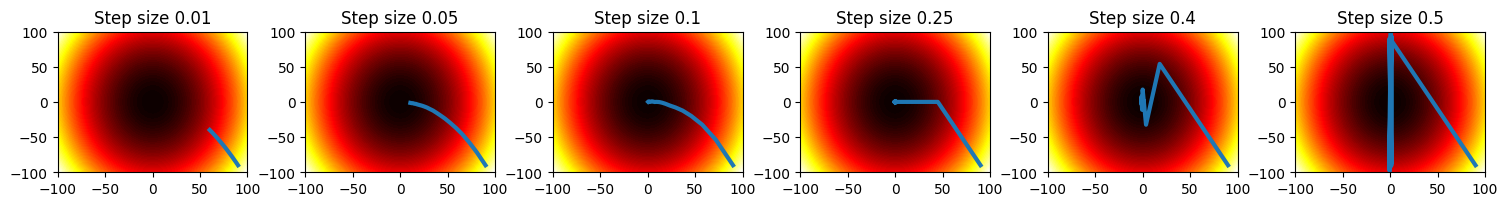

In [11]:
# PLEASE DO NOT REMOVE!
# This piece of code serves for the analysis.
# Running the GD algorithm with different step sizes
num_epochs = 20  # the number of epochs
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5]  # the step sizes

# plotting the convergence of the GD
fig_gd, axs = plt.subplots(1, len(step_sizes), figsize=(15, 2))
fig_gd.tight_layout()

for i in range(len(step_sizes)):
    # take the step size
    step_size = step_sizes[i]
    # init Gradient descent
    gd = GradientDescent(grad, step_size=step_size)
    # plot the convergence
    plot_optimization_process(
        axs[i], optimizer=gd, title="Step size " + str(gd.step_size)
    )

**Question 2 (0-0.5pt)**: Please analyze the plots above and comment on the behavior of the gradient-descent for different values of the step size. What happens in the small and large step sizes and what is the optimum step size?

**Answer**: The smallest step size (0.01) moves very slowly to the target and ultimately fails to effectively converge to the minimum within the given epochs, conversely the largest step size (0.5) overshoots the target and likewise never converges to the minimum. This indicates that the step size should be tuned such that it does not overshoot its target and at the same time is large enough so that it can converge to the minimum in a reasonable amount of epochs. For this particular example a step size between 0.1 and 0.25 seems to be optimal.


**Question 3 (0-0.5pt)**: How can we improve the convergence when the step size equals 0.01? What about when the step size equals 0.5?

**Answer**: In case of step size 0.01 the number of epochs could be increased, this would extend the number of times the algorithm iterates over the dataset, thus improving the chance of convergence with a small step size. Step size 0.5 would benefit from reducing the step size every iteration. For example, If the step size is reduced by half every iteration, while moving towards the minimum it would first overshoot its target, but with each iteration the step size would decrease and the algorithm would ultimately effectively converge to the minimum.

## 3. The derivative-free optimization

In the second part of this assignment, you are asked to implement a derivative-free optimziation (DFO) algorithm. Please notice that you are free to choose any DFO method you wish.
Moreover, you are encouraged to be as imaginative as possible! Do you have an idea for a new method or combine multiple methods? Great!

**Question 4 (0-0.5-1-1.5-2-2.5-3pt)**: Please provide a description (a pseudocode) of your DFO method here.

*NOTE (grading): Please keep in mind: start simple, make sure your approach works. You are encouraged to use your creativity and develop more complex approaches that will influence the grading. TAs will also check whether the pseudocode is correct.*

**Answer:** Hill climbing with step reduction

*Input:* Objective function, step_size, step reduction.

1. Start with a randomly generated initial solution in the search space.
2. The initial solution = current solution
3. Introduce a new solution by adding a bit of random noise, scaled by the step size, to the current solution.
4. Compare the value of the objective function with the current solution to the value of the objective function with the new solution.
5. If the new solution improves the value of the objective function, accept the new solution; else keep current solution.
6. Linearly reduce the step size by a predetermined step reduction rate.
7. repeat step 3 to 6 each epoch.

In [45]:
# =========
# GRADING: 0-0.5-1-1.5-2pt
# 0
# 0.5pt the code works but it is very messy and unclear
# 1.0pt the code works but it is messy and badly commented
# 1.5pt the code works but it is hard to follow in some places
# 2.0pt the code works and it is fully understandable
# =========
# Implement a derivative-free optimization (DFO) algorithm.
# REMARK: during the init, you are supposed to pass the obj_fun and other objects that are necessary in your method.
import random

class DFO(object):
    def __init__(self, obj_fun, step_size, step_reduction) -> None:
        '''
        Initializes a dfo object.
        Params:
          obj_fun: the objective function.
          step_size: The step size that dictates the search space for a new solution.
          step_reduction: The reduction rate of the step size per epoch.
        Returns: None

        '''

        self.obj_fun = obj_fun
        self.step_size = step_size
        self.step_reduction = step_reduction

    def step(self, curr_solution):
        # modify the current solution
        new_solution = (curr_solution + 
                        self.step_size * np.random.randn(*curr_solution.shape))
        #PDF edit

        # Evaluate the objective function at the new solution
        curr_value = self.obj_fun(curr_solution)
        new_value = self.obj_fun(new_solution)

        # If the new value is smaller than the current value accept; else reject.
        if new_value < curr_value:
            return new_solution
        else:
            return curr_solution

    def reduce_step_size(self, epoch):
        # Linearly reduces the step size each epoch
        self.step_size = self.step_size - (self.step_reduction * epoch)



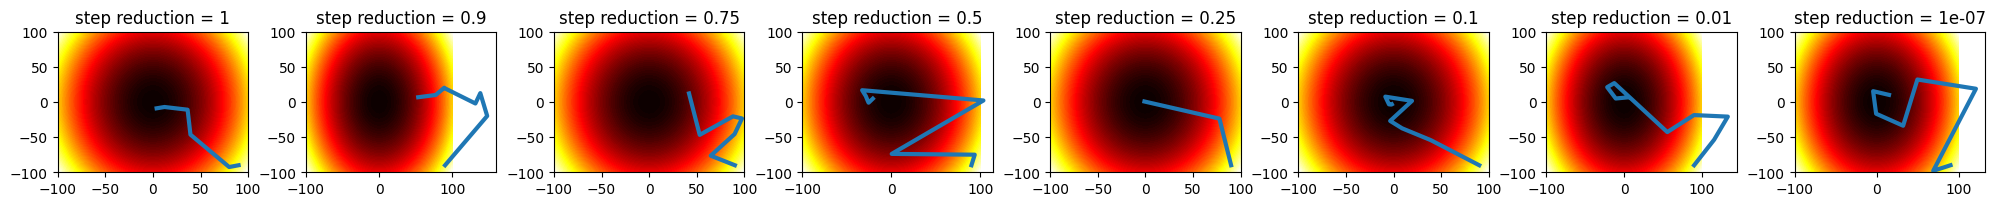

In [52]:
# !!!!!!!! An updated version of the auxiliary function. !!!!!!!!!
# Now it also updates the step_size reduction every epoch
def plot_optimization_process_V2(ax, optimizer, title):
    # Plot the objective function
    ax.contourf(x1, x2, f_x, 100, cmap="hot")

    # Init the solution
    x = np.asarray([[90.0, -90.0]])
    x_opt = x
    # Run the optimization algorithm
    for i in range(num_epochs):
        x = optimizer.step(x)
        x_opt = np.concatenate((x_opt, x), 0)
        optimizer.reduce_step_size(i) # Updates the step size reduction parameter

    ax.plot(x_opt[:, 0], x_opt[:, 1], linewidth=3.0)
    ax.set_title(title)

# PLEASE DO NOT REMOVE!
# Running the DFO algorithm with different step sizes
num_epochs = 50  # the number of epochs (you may change it!)

# PLEASE FILL IN
# Here all hyperparameters go.
# Please analyze at least one hyperparameter in a similar manner to the
# step size in the GD algorithm.
step_reduction_rates = [1, 0.9, 0.75, 0.5, 0.25, 0.1, 0.01, 0.0000001]  # step reduction rates

# plotting the convergence of the DFO
# Please uncomment the two lines below, but please provide the number of axes (replace HERE appriopriately)
fig_dfo, axs = plt.subplots(1, len(step_reduction_rates), figsize=(20, 2))
fig_dfo.tight_layout()

# the for-loop should go over (at least one) parameter(s) (replace HERE appriopriately)
# and uncomment the line below
for i in range(len(step_reduction_rates)):

#    PLEASE FILL IN

    dfo = DFO(f, step_size = 50 , step_reduction = step_reduction_rates[i])


    # plot the convergence
    # please change the title accordingly!
    plot_optimization_process_V2(axs[i], optimizer=dfo, 
                                 title=f'step reduction = {dfo.step_reduction}')
    #PDF edit

**Question 5 (0-0.5-1pt)** Please comment on the behavior of your DFO algorithm. What are the strong points? What are the (potential) weak points? During working on the algorithm, what kind of problems did you encounter?

**Answer:** Because of the step size reduction mechanism of the modified hill climbing algorithm, it is able to initially explore a large portion of the search space. This enables the algorithm to escape local optima while at the same time converging to an optimal value with each epoch. Thus, striking a balance between exploration and exploitation. However, the algorithm does not always seem to converge to a local or global optimum as seen in the step reduction plot of 0.9, 0.75 and 0.5. Clever hyperparameter tuning may minimize this risk by fine-tuning the parameters to better navigate the optimization landscape.

## 4. Final remarks: GD vs. DFO

Eventually, please answer the following last question that will allow you to conclude the assignment draw conclusions.

**Question 6 (0-0.5pt)**: What are differences between the two approaches?

**Answer**: Gradient descent relies on gradient information of the search landscape to converge to a global or local optimum. Convergence relies on factors like the learning rate and the number of epochs. Convergence to a global optimum is not guaranteed however, particularly in non-convex landscapes where it often converges to a local optimum instead. Due to gradient descent's  deterministic nature its ability to explore the search space remains limited.

On the other hand, the modified hill climbing algorithm updates solutions by adding random noise to the current solution, allowing for exploration of the search space and potential escape from local optima. This introduces flexibility and adaptability, particularly in handling non-smooth, non-convex landscapes. Convergence depends on factors such as the step size, number of epochs, step size reduction parameter, optimization landscape, and initialization. However, it's important to observe that convergence to a local or global optimum is not always guaranteed

**Question 7 (0-0.5)**: Which of the is easier to apply? Why? In what situations? Which of them is easier to implement in general?

**Answer**: In general the modified hill climbing algorithm is easier to apply, due to the fact that there is no need for calculating a gradient. This is a big advantage in cases where this information is not readily available. Furthermore, as mentioned before, modified hill climbing is a good method for exploring non-convex and non-smooth landscapes. On the other hand, gradient descent does rely on gradient information, which means it needs more computations to be implemented properly. It is good for searching smooth landscapes where exploration is less important and reaching a local optimum is acceptable.